In [1]:
from keras.layers import Dense, Input
from keras.models import Model, Sequential
from observations import mnist as mnist_obs
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from utils import visulize

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist_obs('./data')

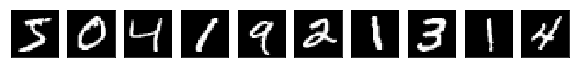

In [3]:
visulize(10,x_train)

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
encoding_dim = 256
input_img = Input((28*28,))
encoded = Dense(encoding_dim,activation = 'relu')(input_img)
decoded = Dense(28*28, activation = 'sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=1000,
                shuffle=True,
                validation_data=(x_test, x_test),
          verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.5066 - val_loss: 0.3097
Epoch 2/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2877 - val_loss: 0.2745
Epoch 3/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2701 - val_loss: 0.2638
Epoch 4/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2603 - val_loss: 0.2544
Epoch 5/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2508 - val_loss: 0.2446
Epoch 6/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2412 - val_loss: 0.2350
Epoch 7/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.2320 - val_loss: 0.2260
Epoch 8/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2236 - val_loss: 0.2181
Epoch 9/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2161 - val_loss: 0.2110
Epoch

In [7]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

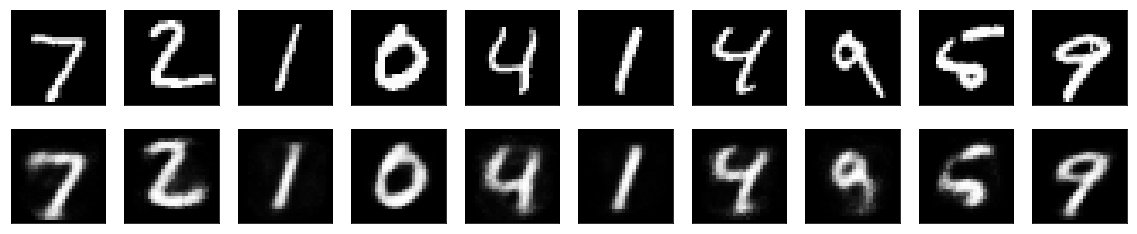

In [8]:
visulize(10, x_test, decoded_imgs, show_pred = True)

In [9]:
train_encoded = encoder.predict(x_train)
test_encoded = encoder.predict(x_test)

# uncomment to save the representation learned

#with open('./data/encoded_train_AE.pkl','wb') as f:
#    pickle.dump(train_encoded,f)
#with open('./data/encoded_test_AE.pkl','wb') as f:
#    pickle.dump(test_encoded,f)

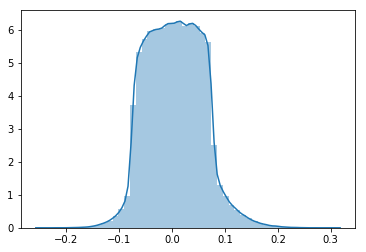

In [10]:
weights = autoencoder.get_weights()
sns.distplot(np.ndarray.flatten(weights[0]))
plt.show()

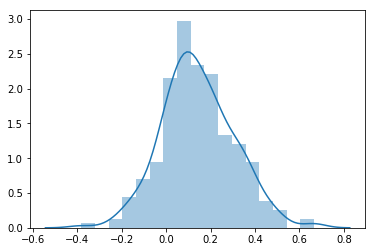

In [11]:
sns.distplot(weights[1])
plt.show()

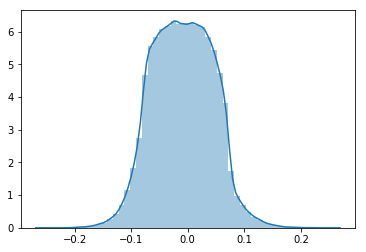

In [12]:
sns.distplot(np.ndarray.flatten(weights[2]))
plt.show()

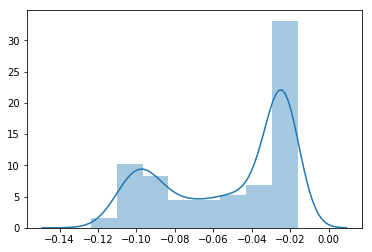

In [13]:
sns.distplot(weights[3])
plt.show()